In [43]:
import json
import pandas as pd
from tqdm import tqdm
from bs4 import BeautifulSoup

In [3]:
with open("./sample_비타민C 메가도스_230911.json", "r", encoding='utf-8') as f:
    blog = json.load(f)

In [5]:
idx = 0

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0 Safari/537.36 Edg/116.0.1938.76" lang="ko"><head>
<meta content="no-cache" http-equiv="Pragma"/>
<meta content="-1" http-equiv="Expires"/>
<meta content="always" name="referrer"/>
<!--[if ie]>
<style type="text/css">
html {overflow: scroll; overflow-x: auto;}
</style>
<![endif]-->
<link charset="UTF-8" href="https://ssl.pstatic.net/t.static.blog/mylog/versioning/LayoutTopCommon-358144226_https.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/t.static.blog/mylog/versioning//common/css/music/player-d3fc09e_https.css" rel="stylesheet" type="text/css"/>
<link href="/favicon.ico?3" rel="shortcut icon" type="image/x-icon"/>
<meta content="비타블로썸 비타민C 메가도스 요법 직접 해본 후기" property="og:title"/>
<meta content="https://blogthumb.pstatic.net/MjAyMzAyMjFfMTAw/MDAxNjc2OTYxOTA1MzYy.LLxxYOwkmac3fzqOIfTTPKyshyhxN6V0c8TD-tbZ1i4g.nitqCtW3Q23dDYPc-Eqp8NbnLBLJw_PTi
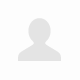
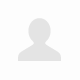

In [8]:
soup = BeautifulSoup(blog[idx]["origin_source"], 'html.parser')
soup

In [21]:
body_soup = soup.find("div", {"class": "se-main-container"})
body_soup

<div class="se-main-container">
<div class="se-component se-quotation se-l-default" id="SE-c2be3f82-6a84-4f10-be32-501c44a9d99f">
<div class="se-component-content">
<div class="se-section se-section-quotation se-l-default">
<blockquote class="se-quotation-container">
<div class="se-module se-module-text se-quote"><!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-" id="SE-987ddbe3-f905-403b-a0f9-d0453cbc3cb3" style=""><span class="se-fs- se-ff-" id="SE-dfc7eba0-692c-4849-8287-d7fa5d95c3a4" style="">비타블로썸 메가비타민C3000 메가도스요법 후기</span></p><!-- } SE-TEXT --></div>
</blockquote>
</div>
</div>
</div>
<div class="se-component se-text se-l-default" id="SE-98a298d8-662c-4b29-b196-177ee802a2b2">
<div class="se-component-content">
<div class="se-section se-section-text se-l-default">
<div class="se-module se-module-text">
<!-- SE-TEXT { --><p class="se-text-paragraph se-text-paragraph-align-center" id="SE-466fcff9-aec0-4160-afb4-fa796fe01b2f" style="line-height:2.1;"><span class

In [40]:
body_soup.find_all("div", {"class": "se-module"})[-4]

<div class="se-module se-module-oglink">
<a class="se-oglink-thumbnail" href="https://smartstore.naver.com/chodanghc" target="_blank">
<img alt="" class="se-oglink-thumbnail-resource egjs-visible" src="https://dthumb-phinf.pstatic.net/?src=%22https%3A%2F%2Fshop-phinf.pstatic.net%2F20230102_55%2F1672646015198uVKGG_PNG%2F73781910932749854_849889679.png%3Ftype%3Do1000%22&amp;type=ff500_300"/>
</a>
<a class="se-oglink-info" href="https://smartstore.naver.com/chodanghc" target="_blank">
<div class="se-oglink-info-container">
<strong class="se-oglink-title">비타블로썸 공식몰 : 네이버쇼핑 스마트스토어</strong>
<p class="se-oglink-summary">🍋100% 영국산 고함량 비타민C🍋 비타블로썸 공식몰입니다 :)</p>
<p class="se-oglink-url">smartstore.naver.com</p>
</div>
</a>
</div>

In [19]:
blog[idx]['url']

'https://blog.naver.com/gripia84/223023074670'

In [46]:
def extract_text(source: str):
    soup = BeautifulSoup(source, 'html.parser')
    body_soup = soup.find("div", {"class": "se-main-container"})
    
    text = body_soup.text if body_soup else ""
    return text

In [47]:
result = []
for data in tqdm(blog):
    temp = data.copy()
    
    temp['text'] = extract_text(temp['origin_source'])
    del temp['origin_source']
    
    result.append(temp)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 974/974 [01:17<00:00, 12.65it/s]


In [50]:
df = pd.DataFrame(result)

In [62]:
df[df.text.str.contains("내돈내산")].sort_values('title')

,title,url,blog_name,date,text
393,1탄)(내돈내산)<b>비타민C 메가도스</b> 효과,https://blog.naver.com/jaeok777/223061103189,비타민c 전도사의 블로그,20230331,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n난 블로그를 시작하면서 블...
578,20대건강챙기기] <b>메가도스</b> <b>비타민C</b> 도전_메가씨3000후기,https://blog.naver.com/echeawon/222719612002,이채원의 세상구경,20220503,\n\n\n\n\n세상구경 하는 일에 늘 바쁜 나는건강챙기기에 매우 소홀하다.​늘 ...
482,2탄)(내돈내산)<b>비타민C 메가도스</b> 제품선택(국산제품이 답이다!!!),https://blog.naver.com/jaeok777/223064081831,비타민c 전도사의 블로그,20230404,"\n\n\n\n\n""비타민C 메가도스 어떤 제품으로 시작해야 할까요?"" \n\n\n..."
553,4탄)<b>비타민C 메가도스</b> (고용량 용법) 가 필요한 사람!!!!(속이...,https://blog.naver.com/jaeok777/223067358892,비타민c 전도사의 블로그,20230407,\n\n\n\n\n​안녕하세요? 비타짱입니다.\n\n\n\n \n\n\n\n\n\n...
494,5탄) (사랑하는 현숙님께!!!) <b>비타민C 메가도스</b>(고용량 용법),https://blog.naver.com/jaeok777/223076565346,비타민c 전도사의 블로그,20230417,\n\n\n\n\n사랑하는 현숙님!!!!\n\n\n\n \n\n\n\n\n\n\n\...
462,"<b>메가도스</b> <b>비타민C</b> 복용! 휴온스 메리트C산 2,000mg ...",https://blog.naver.com/super200227/223071871904,간단하게 사는 곳,20230412,\n\n\n\n\n안녕하세요~~건강하고 행복한 삶을 소망하는 미니멀라이프 입니다.\...
268,<b>메가도스</b> 뜻 고려은단 <b>비타민 C</b> : 내돈내산 2개월 복용 ...,https://blog.naver.com/hooah_hooah/223147715120,남천동 만세부동산,20230705,"\n\n\n\n\n메가도스 2개월 복용했고, 현재 3개월 차 진행중입니다. 메가도스..."
196,<b>비타민 C 메가도스</b> 후기(feat.1년 6개월),https://blog.naver.com/watson010/223168047971,VANILLA CREAM,20230728,\n\n\n\n\n​안녕하세요~​​​비타민 C 메가도스 약 1년 6개월 복용 후기입...
47,"<b>비타민C 메가도스</b> (CGN)비염 위해 유산균,비타민B,D 추천",https://blog.naver.com/ofagirl/223092332810,JJu's 소소일기,20230503,"\n\n\n\n\n비타민C 메가도스 (CGN) 비염 위해 유산균, 비타민 B, D ..."
95,<b>비타민C 메가도스</b> 고용량 7개월 복용후기,https://blog.naver.com/jully71/222345106697,슬기로운 환자생활,20210510,\n\n\n\n\n비타민C 메가도스 고용량 7개월 복용후기 입니다. 비타민C 고용...


In [59]:
df.to_excel("./sample_비타민C메가도스.xlsx")